In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torch.utils.data as Data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import tqdm

In [2]:
dataset = datasets.load_boston()

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        targ

In [3]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
df = pd.DataFrame(dataset.data)
df.columns = dataset.feature_names

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['Prices'] = dataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Prices
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
X = dataset.data
Y = dataset.target

In [9]:
print(X.shape)

(506, 13)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=5)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [12]:
class DataMaker(Data.Dataset):
    
    def __init__(self, X, Y):
        scaler = MinMaxScaler()
        self.data = scaler.fit_transform(X)
        self.data = self.data.astype(np.float32)
        self.label = Y.astype(np.float32)
        
    def __getitem__(self, i):
        return self.data[i, :], self.label[i]
    
    def __len__(self):
        return len(self.label)

In [13]:
train_set = DataMaker(X_train, Y_train)
test_set = DataMaker(X_test, Y_test)

In [14]:
print(train_set[2])

(array([8.4185791e-05, 8.0000001e-01, 0.0000000e+00, 0.0000000e+00,
       7.6131687e-02, 8.2659513e-01, 2.9969105e-01, 4.7787142e-01,
       1.3043478e-01, 1.2810707e-01, 1.9148937e-01, 9.9326742e-01,
       3.4216337e-02], dtype=float32), 50.0)


In [15]:
class Model(nn.Module):
    
    def __init__(self, n_features, hidden_layer_1, hidden_layer_2):
        super(Model, self).__init__()
        
        self.layer_1 = nn.Linear(n_features, hidden_layer_1)
        self.layer_2 = nn.Linear(hidden_layer_1, hidden_layer_2)
        self.layer_3 = nn.Linear(hidden_layer_2, 1)
        
    def forward(self, data):
        hid_layer_1 = F.relu(self.layer_1(data))
        hid_layer_2 = F.relu(self.layer_2(hid_layer_1))
        return self.layer_3(hid_layer_2)

In [16]:
torch.manual_seed(5)

In [17]:
batch = 40
train_loder = Data.DataLoader(train_set, batch_size = batch, shuffle = True)
test_loder = Data.DataLoader(test_set, batch_size = batch, shuffle = True)

In [18]:
net = Model(X.shape[1], 200, 100)

In [19]:
net.parameters

<bound method Module.parameters of Model(
  (layer_1): Linear(in_features=13, out_features=200, bias=True)
  (layer_2): Linear(in_features=200, out_features=100, bias=True)
  (layer_3): Linear(in_features=100, out_features=1, bias=True)
)>

In [20]:
cost = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.003)

In [21]:
n_epochs = 1000

all_cost = []

for epoch in range(n_epochs):
    progress_bar = tqdm.tqdm(train_loder, leave = False)
    losses = []
#     count = 0
    for inputs, target in progress_bar:
        optimizer.zero_grad()
        
        y_pred = net(inputs)  # Forward Propogation
        
        loss = cost(y_pred, target)
        
        loss.backward()        # Calculate backward Gradients
        
        optimizer.step()       # Perform Gradient descent
        
        progress_bar.set_description(f'Loss: {loss.item()}')
        
        losses.append(loss.item())
        
#         count += 1
        
    epoch_loss = sum(losses)/batch
    
    all_cost.append(epoch_loss)
    
    string = f'\t On Epoch: {epoch} Loss: {all_cost[-1]}'
    
    tqdm.tqdm.write(string)

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([40])) that is different to the input size (torch.Size([40, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
Loss: 99.95214080810547:   0%|                                                                  | 0/10 [00:00<?, ?it/s]C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([19])) that is different to the input size (torch.Size([19, 1])). This will likely lead to incorrect results

	 On Epoch: 0 Loss: 83.99006290435791


	 On Epoch: 1 Loss: 24.45830593109131


	 On Epoch: 2 Loss: 23.6070915222168


	 On Epoch: 3 Loss: 25.873385620117187


	 On Epoch: 4 Loss: 23.39107503890991


	 On Epoch: 5 Loss: 22.866890335083006


	 On Epoch: 6 Loss: 22.0967529296875


	 On Epoch: 7 Loss: 21.995312690734863


	 On Epoch: 8 Loss: 22.205259227752684


	 On Epoch: 9 Loss: 29.850929832458498


	 On Epoch: 10 Loss: 25.07002983093262


	 On Epoch: 11 Loss: 24.563673305511475


	 On Epoch: 12 Loss: 26.10354166030884


	 On Epoch: 13 Loss: 23.528784370422365


	 On Epoch: 14 Loss: 22.2936071395874


	 On Epoch: 15 Loss: 22.27634468078613


	 On Epoch: 16 Loss: 24.445795345306397


	 On Epoch: 17 Loss: 26.3726824760437


	 On Epoch: 18 Loss: 24.432575988769532


	 On Epoch: 19 Loss: 22.45095376968384


	 On Epoch: 20 Loss: 21.737778663635254


	 On Epoch: 21 Loss: 23.343457889556884


	 On Epoch: 22 Loss: 22.862905502319336


	 On Epoch: 23 Loss: 21.95825023651123


	 On Epoch: 24 Loss: 22.468228149414063


	 On Epoch: 25 Loss: 23.50951223373413


	 On Epoch: 26 Loss: 23.865008926391603


	 On Epoch: 27 Loss: 23.32747116088867


	 On Epoch: 28 Loss: 25.183437061309814


	 On Epoch: 29 Loss: 23.416173458099365


	 On Epoch: 30 Loss: 22.541675758361816


	 On Epoch: 31 Loss: 24.27609462738037


	 On Epoch: 32 Loss: 22.167323684692384


	 On Epoch: 33 Loss: 22.925467491149902


	 On Epoch: 34 Loss: 22.04318380355835


	 On Epoch: 35 Loss: 22.01143350601196


	 On Epoch: 36 Loss: 23.817154598236083


	 On Epoch: 37 Loss: 22.265581130981445


	 On Epoch: 38 Loss: 22.84730472564697


	 On Epoch: 39 Loss: 23.079089546203612


	 On Epoch: 40 Loss: 22.805496406555175


	 On Epoch: 41 Loss: 22.92266273498535


	 On Epoch: 42 Loss: 20.773916816711427


	 On Epoch: 43 Loss: 23.465227317810058


	 On Epoch: 44 Loss: 23.96286563873291


	 On Epoch: 45 Loss: 25.231048679351808


	 On Epoch: 46 Loss: 23.725065422058105


	 On Epoch: 47 Loss: 21.95051555633545


	 On Epoch: 48 Loss: 22.312474250793457


	 On Epoch: 49 Loss: 22.91523332595825


	 On Epoch: 50 Loss: 21.42797269821167


	 On Epoch: 51 Loss: 22.526406955718993


	 On Epoch: 52 Loss: 22.532631587982177


	 On Epoch: 53 Loss: 23.144246768951415


	 On Epoch: 54 Loss: 22.358615684509278


	 On Epoch: 55 Loss: 23.422515964508058


	 On Epoch: 56 Loss: 24.002275371551512


	 On Epoch: 57 Loss: 24.313813829421996


	 On Epoch: 58 Loss: 23.4438063621521


	 On Epoch: 59 Loss: 24.211449241638185


	 On Epoch: 60 Loss: 23.365376281738282


	 On Epoch: 61 Loss: 22.417226600646973


	 On Epoch: 62 Loss: 22.297769165039064


	 On Epoch: 63 Loss: 21.452472400665282


	 On Epoch: 64 Loss: 21.20492000579834


	 On Epoch: 65 Loss: 22.99282512664795


	 On Epoch: 66 Loss: 22.805648136138917


	 On Epoch: 67 Loss: 22.91975841522217


	 On Epoch: 68 Loss: 22.509066581726074


	 On Epoch: 69 Loss: 22.045676898956298


	 On Epoch: 70 Loss: 22.599020957946777


	 On Epoch: 71 Loss: 23.300050354003908


	 On Epoch: 72 Loss: 22.050887680053712


	 On Epoch: 73 Loss: 22.487860202789307


	 On Epoch: 74 Loss: 21.780778217315675


	 On Epoch: 75 Loss: 22.59207420349121


	 On Epoch: 76 Loss: 21.42599287033081


	 On Epoch: 77 Loss: 23.532043075561525


	 On Epoch: 78 Loss: 24.28536033630371


	 On Epoch: 79 Loss: 23.302746391296388


	 On Epoch: 80 Loss: 22.128954696655274


	 On Epoch: 81 Loss: 22.1422061920166


	 On Epoch: 82 Loss: 22.046442604064943


	 On Epoch: 83 Loss: 22.022703456878663


	 On Epoch: 84 Loss: 21.01820182800293


	 On Epoch: 85 Loss: 21.568774509429932


	 On Epoch: 86 Loss: 22.005889892578125


	 On Epoch: 87 Loss: 21.826032638549805


	 On Epoch: 88 Loss: 22.04150061607361


	 On Epoch: 89 Loss: 21.582013034820555


	 On Epoch: 90 Loss: 24.62123050689697


	 On Epoch: 91 Loss: 22.233922290802003


	 On Epoch: 92 Loss: 22.332286834716797


	 On Epoch: 93 Loss: 22.340461826324464


	 On Epoch: 94 Loss: 22.284284019470213


	 On Epoch: 95 Loss: 21.89908113479614


	 On Epoch: 96 Loss: 22.23835220336914


	 On Epoch: 97 Loss: 22.439468955993654


	 On Epoch: 98 Loss: 22.589768409729004


	 On Epoch: 99 Loss: 21.57953405380249


	 On Epoch: 100 Loss: 22.27210388183594


	 On Epoch: 101 Loss: 21.667337799072264


	 On Epoch: 102 Loss: 21.027760791778565


	 On Epoch: 103 Loss: 21.158108043670655


	 On Epoch: 104 Loss: 22.66419925689697


	 On Epoch: 105 Loss: 21.261896705627443


	 On Epoch: 106 Loss: 21.808711814880372


	 On Epoch: 107 Loss: 24.560101127624513


	 On Epoch: 108 Loss: 24.01231517791748


	 On Epoch: 109 Loss: 22.377780055999757


	 On Epoch: 110 Loss: 21.392020606994627


	 On Epoch: 111 Loss: 22.07940731048584


	 On Epoch: 112 Loss: 23.153848552703856


	 On Epoch: 113 Loss: 22.23211317062378


	 On Epoch: 114 Loss: 21.843252658843994


	 On Epoch: 115 Loss: 21.930994510650635


	 On Epoch: 116 Loss: 22.46936979293823


	 On Epoch: 117 Loss: 22.82731113433838


	 On Epoch: 118 Loss: 21.557852363586427


	 On Epoch: 119 Loss: 21.028744983673096


	 On Epoch: 120 Loss: 22.0114785194397


	 On Epoch: 121 Loss: 22.5734561920166


	 On Epoch: 122 Loss: 21.718930625915526


	 On Epoch: 123 Loss: 22.5187894821167


	 On Epoch: 124 Loss: 22.89302749633789


	 On Epoch: 125 Loss: 21.767656803131104


	 On Epoch: 126 Loss: 22.64680986404419


	 On Epoch: 127 Loss: 21.934641647338868


	 On Epoch: 128 Loss: 22.63390474319458


	 On Epoch: 129 Loss: 22.079995346069335


	 On Epoch: 130 Loss: 22.555826091766356


	 On Epoch: 131 Loss: 20.924708747863768


	 On Epoch: 132 Loss: 21.75084218978882


	 On Epoch: 133 Loss: 23.321833419799805


	 On Epoch: 134 Loss: 21.878532028198244


	 On Epoch: 135 Loss: 21.35492811203003


	 On Epoch: 136 Loss: 20.83798704147339


	 On Epoch: 137 Loss: 22.328762435913085


	 On Epoch: 138 Loss: 21.990821838378906


	 On Epoch: 139 Loss: 21.45296812057495


	 On Epoch: 140 Loss: 22.66002779006958


	 On Epoch: 141 Loss: 22.142101669311522


	 On Epoch: 142 Loss: 21.472671508789062


	 On Epoch: 143 Loss: 21.209764575958253


	 On Epoch: 144 Loss: 22.46287775039673


	 On Epoch: 145 Loss: 22.378310441970825


	 On Epoch: 146 Loss: 24.26183614730835


	 On Epoch: 147 Loss: 23.869896697998048


	 On Epoch: 148 Loss: 23.011712741851806


	 On Epoch: 149 Loss: 21.780542945861818


	 On Epoch: 150 Loss: 21.48886079788208


	 On Epoch: 151 Loss: 21.855034828186035


	 On Epoch: 152 Loss: 22.252344703674318


	 On Epoch: 153 Loss: 21.381204414367676


	 On Epoch: 154 Loss: 21.76316614151001


	 On Epoch: 155 Loss: 21.102852725982665


	 On Epoch: 156 Loss: 21.579652070999146


	 On Epoch: 157 Loss: 22.031405639648437


	 On Epoch: 158 Loss: 21.540967559814455


	 On Epoch: 159 Loss: 20.964274406433105


	 On Epoch: 160 Loss: 21.693314456939696


	 On Epoch: 161 Loss: 21.993750667572023


	 On Epoch: 162 Loss: 21.583968353271484


	 On Epoch: 163 Loss: 22.22527132034302


	 On Epoch: 164 Loss: 22.352766036987305


	 On Epoch: 165 Loss: 22.199158573150633


	 On Epoch: 166 Loss: 22.39571895599365


	 On Epoch: 167 Loss: 22.548543071746828


	 On Epoch: 168 Loss: 22.613331508636474


	 On Epoch: 169 Loss: 20.8103045463562


	 On Epoch: 170 Loss: 21.188519096374513


	 On Epoch: 171 Loss: 22.47140817642212


	 On Epoch: 172 Loss: 22.33464288711548


	 On Epoch: 173 Loss: 22.521460914611815


	 On Epoch: 174 Loss: 22.213033199310303


	 On Epoch: 175 Loss: 21.405300045013426


	 On Epoch: 176 Loss: 21.074314498901366


	 On Epoch: 177 Loss: 22.283850479125977


	 On Epoch: 178 Loss: 21.71695499420166


	 On Epoch: 179 Loss: 21.395290660858155


	 On Epoch: 180 Loss: 22.89653558731079


	 On Epoch: 181 Loss: 20.918587827682494


	 On Epoch: 182 Loss: 22.807362747192382


	 On Epoch: 183 Loss: 22.39435453414917


	 On Epoch: 184 Loss: 21.64114828109741


	 On Epoch: 185 Loss: 21.256153106689453


	 On Epoch: 186 Loss: 22.054257011413576


	 On Epoch: 187 Loss: 21.838774013519288


	 On Epoch: 188 Loss: 20.64308452606201


	 On Epoch: 189 Loss: 21.487605381011964


	 On Epoch: 190 Loss: 22.50318613052368


	 On Epoch: 191 Loss: 23.26754837036133


	 On Epoch: 192 Loss: 21.991001176834107


	 On Epoch: 193 Loss: 21.69161539077759


	 On Epoch: 194 Loss: 21.806006908416748


	 On Epoch: 195 Loss: 21.531419944763183


	 On Epoch: 196 Loss: 21.043995666503907


	 On Epoch: 197 Loss: 21.76283130645752


	 On Epoch: 198 Loss: 21.388489055633546


	 On Epoch: 199 Loss: 22.449832916259766


	 On Epoch: 200 Loss: 21.079917240142823


	 On Epoch: 201 Loss: 22.131733894348145


	 On Epoch: 202 Loss: 21.06809196472168


	 On Epoch: 203 Loss: 22.010696601867675


	 On Epoch: 204 Loss: 21.3532283782959


	 On Epoch: 205 Loss: 21.59670419692993


	 On Epoch: 206 Loss: 20.937801361083984


	 On Epoch: 207 Loss: 21.303292655944823


	 On Epoch: 208 Loss: 21.19069833755493


	 On Epoch: 209 Loss: 21.175522232055663


	 On Epoch: 210 Loss: 21.39886064529419


	 On Epoch: 211 Loss: 21.061910724639894


	 On Epoch: 212 Loss: 21.427601051330566


	 On Epoch: 213 Loss: 22.041353034973145


	 On Epoch: 214 Loss: 21.69916343688965


	 On Epoch: 215 Loss: 21.13239860534668


	 On Epoch: 216 Loss: 21.376646041870117


	 On Epoch: 217 Loss: 21.52518653869629


	 On Epoch: 218 Loss: 22.112244510650633


	 On Epoch: 219 Loss: 21.30056381225586


	 On Epoch: 220 Loss: 21.491615772247314


	 On Epoch: 221 Loss: 21.704627799987794


	 On Epoch: 222 Loss: 21.214110374450684


	 On Epoch: 223 Loss: 21.2809947013855


	 On Epoch: 224 Loss: 22.620772933959962


	 On Epoch: 225 Loss: 21.461081981658936


	 On Epoch: 226 Loss: 21.682679843902587


	 On Epoch: 227 Loss: 22.279802513122558


	 On Epoch: 228 Loss: 21.133026790618896


	 On Epoch: 229 Loss: 21.440008640289307


	 On Epoch: 230 Loss: 22.012259483337402


	 On Epoch: 231 Loss: 21.038021183013917


	 On Epoch: 232 Loss: 22.49478073120117


	 On Epoch: 233 Loss: 21.947539234161376


	 On Epoch: 234 Loss: 22.21298007965088


	 On Epoch: 235 Loss: 22.032600593566894


	 On Epoch: 236 Loss: 21.84283971786499


	 On Epoch: 237 Loss: 21.42040605545044


	 On Epoch: 238 Loss: 21.74978036880493


	 On Epoch: 239 Loss: 21.266326904296875


	 On Epoch: 240 Loss: 21.861858463287355


	 On Epoch: 241 Loss: 21.373611068725587


	 On Epoch: 242 Loss: 21.032799911499023


	 On Epoch: 243 Loss: 20.811053848266603


	 On Epoch: 244 Loss: 21.941292095184327


	 On Epoch: 245 Loss: 22.24510078430176


	 On Epoch: 246 Loss: 21.729549980163576


	 On Epoch: 247 Loss: 20.756375122070313


	 On Epoch: 248 Loss: 21.609146785736083


	 On Epoch: 249 Loss: 21.33262767791748


	 On Epoch: 250 Loss: 21.741227388381958


	 On Epoch: 251 Loss: 21.683386611938477


	 On Epoch: 252 Loss: 22.58401041030884


	 On Epoch: 253 Loss: 23.00233573913574


	 On Epoch: 254 Loss: 20.96772747039795


	 On Epoch: 255 Loss: 21.06856002807617


	 On Epoch: 256 Loss: 21.48911085128784


	 On Epoch: 257 Loss: 21.167505264282227


	 On Epoch: 258 Loss: 21.43667221069336


	 On Epoch: 259 Loss: 21.531284904479982


	 On Epoch: 260 Loss: 21.514895153045654


	 On Epoch: 261 Loss: 21.71843957901001


	 On Epoch: 262 Loss: 21.37815866470337


	 On Epoch: 263 Loss: 22.14099254608154


	 On Epoch: 264 Loss: 20.977199745178222


	 On Epoch: 265 Loss: 21.70526189804077


	 On Epoch: 266 Loss: 21.65668668746948


	 On Epoch: 267 Loss: 21.72413053512573


	 On Epoch: 268 Loss: 21.614196872711183


	 On Epoch: 269 Loss: 22.16393976211548


	 On Epoch: 270 Loss: 21.58693895339966


	 On Epoch: 271 Loss: 20.884778690338134


	 On Epoch: 272 Loss: 21.180182647705077


	 On Epoch: 273 Loss: 21.140512561798097


	 On Epoch: 274 Loss: 21.243279266357423


	 On Epoch: 275 Loss: 21.258274936676024


	 On Epoch: 276 Loss: 21.76190118789673


	 On Epoch: 277 Loss: 22.26901731491089


	 On Epoch: 278 Loss: 21.870501708984374


	 On Epoch: 279 Loss: 20.95752086639404


	 On Epoch: 280 Loss: 21.348884773254394


	 On Epoch: 281 Loss: 21.367158317565917


	 On Epoch: 282 Loss: 21.232176303863525


	 On Epoch: 283 Loss: 21.85122880935669


	 On Epoch: 284 Loss: 21.12969036102295


	 On Epoch: 285 Loss: 20.80740909576416


	 On Epoch: 286 Loss: 20.53602647781372


	 On Epoch: 287 Loss: 21.476280689239502


	 On Epoch: 288 Loss: 21.864872169494628


	 On Epoch: 289 Loss: 21.029913234710694


	 On Epoch: 290 Loss: 21.382868003845214


	 On Epoch: 291 Loss: 21.524931335449217


	 On Epoch: 292 Loss: 21.702499103546142


	 On Epoch: 293 Loss: 22.288092613220215


	 On Epoch: 294 Loss: 21.387134742736816


	 On Epoch: 295 Loss: 21.9702205657959


	 On Epoch: 296 Loss: 21.749679183959962


	 On Epoch: 297 Loss: 21.10957841873169


	 On Epoch: 298 Loss: 21.699659156799317


	 On Epoch: 299 Loss: 21.61934700012207


	 On Epoch: 300 Loss: 21.035249137878417


	 On Epoch: 301 Loss: 21.02842378616333


	 On Epoch: 302 Loss: 21.84530439376831


	 On Epoch: 303 Loss: 20.931979751586915


	 On Epoch: 304 Loss: 21.54289026260376


	 On Epoch: 305 Loss: 20.980320930480957


	 On Epoch: 306 Loss: 22.255509471893312


	 On Epoch: 307 Loss: 21.763192176818848


	 On Epoch: 308 Loss: 21.35741424560547


	 On Epoch: 309 Loss: 20.465937232971193


	 On Epoch: 310 Loss: 20.806131649017335


	 On Epoch: 311 Loss: 20.81815948486328


	 On Epoch: 312 Loss: 21.545526885986327


	 On Epoch: 313 Loss: 21.37027406692505


	 On Epoch: 314 Loss: 21.236011219024657


	 On Epoch: 315 Loss: 21.699471282958985


	 On Epoch: 316 Loss: 21.80104751586914


	 On Epoch: 317 Loss: 21.04054775238037


	 On Epoch: 318 Loss: 21.41864194869995


	 On Epoch: 319 Loss: 20.8745005607605


	 On Epoch: 320 Loss: 21.492889595031738


	 On Epoch: 321 Loss: 20.681431007385253


	 On Epoch: 322 Loss: 23.003376960754395


	 On Epoch: 323 Loss: 21.502198505401612


	 On Epoch: 324 Loss: 22.845068168640136


	 On Epoch: 325 Loss: 22.129122829437257


	 On Epoch: 326 Loss: 21.146620559692384


	 On Epoch: 327 Loss: 21.17112855911255


	 On Epoch: 328 Loss: 21.340295219421385


	 On Epoch: 329 Loss: 22.423972129821777


	 On Epoch: 330 Loss: 20.821231651306153


	 On Epoch: 331 Loss: 21.069901752471925


	 On Epoch: 332 Loss: 21.665226459503174


	 On Epoch: 333 Loss: 22.05522584915161


	 On Epoch: 334 Loss: 21.129133796691896


	 On Epoch: 335 Loss: 20.880270195007324


	 On Epoch: 336 Loss: 21.494376754760744


	 On Epoch: 337 Loss: 20.888675689697266


	 On Epoch: 338 Loss: 20.972182941436767


	 On Epoch: 339 Loss: 21.281127166748046


	 On Epoch: 340 Loss: 21.558915233612062


	 On Epoch: 341 Loss: 21.849580192565917


	 On Epoch: 342 Loss: 21.13216552734375


	 On Epoch: 343 Loss: 21.795767879486085


	 On Epoch: 344 Loss: 20.61192684173584


	 On Epoch: 345 Loss: 21.65733594894409


	 On Epoch: 346 Loss: 21.88812894821167


	 On Epoch: 347 Loss: 21.01108283996582


	 On Epoch: 348 Loss: 21.46718101501465


	 On Epoch: 349 Loss: 21.79619770050049


	 On Epoch: 350 Loss: 21.313177871704102


	 On Epoch: 351 Loss: 21.171332454681398


	 On Epoch: 352 Loss: 21.05177879333496


	 On Epoch: 353 Loss: 21.380552959442138


	 On Epoch: 354 Loss: 21.507733631134034


	 On Epoch: 355 Loss: 21.84252586364746


	 On Epoch: 356 Loss: 20.71633310317993


	 On Epoch: 357 Loss: 21.999321842193602


	 On Epoch: 358 Loss: 21.936058664321898


	 On Epoch: 359 Loss: 21.40764455795288


	 On Epoch: 360 Loss: 21.527694511413575


	 On Epoch: 361 Loss: 20.944343185424806


	 On Epoch: 362 Loss: 21.3590895652771


	 On Epoch: 363 Loss: 21.45563621520996


	 On Epoch: 364 Loss: 20.874243640899657


	 On Epoch: 365 Loss: 20.81839084625244


	 On Epoch: 366 Loss: 21.656072235107423


	 On Epoch: 367 Loss: 21.504959392547608


	 On Epoch: 368 Loss: 21.502875900268556


	 On Epoch: 369 Loss: 21.28320655822754


	 On Epoch: 370 Loss: 20.907268714904784


	 On Epoch: 371 Loss: 21.299812030792236


	 On Epoch: 372 Loss: 22.498633289337157


	 On Epoch: 373 Loss: 21.158341789245604


	 On Epoch: 374 Loss: 21.134642124176025


	 On Epoch: 375 Loss: 21.028869152069092


	 On Epoch: 376 Loss: 21.811863136291503


	 On Epoch: 377 Loss: 20.740327262878417


	 On Epoch: 378 Loss: 21.68131551742554


	 On Epoch: 379 Loss: 21.25937442779541


	 On Epoch: 380 Loss: 21.572974967956544


	 On Epoch: 381 Loss: 20.794076681137085


	 On Epoch: 382 Loss: 21.642910289764405


	 On Epoch: 383 Loss: 21.478951740264893


	 On Epoch: 384 Loss: 22.503927803039552


	 On Epoch: 385 Loss: 21.293983459472656


	 On Epoch: 386 Loss: 21.181734466552733


	 On Epoch: 387 Loss: 22.23978796005249


	 On Epoch: 388 Loss: 20.984409236907958


	 On Epoch: 389 Loss: 22.152494144439697


	 On Epoch: 390 Loss: 21.203821659088135


	 On Epoch: 391 Loss: 21.120252990722655


	 On Epoch: 392 Loss: 21.63431215286255


	 On Epoch: 393 Loss: 20.870989322662354


	 On Epoch: 394 Loss: 20.960833168029787


	 On Epoch: 395 Loss: 21.29331398010254


	 On Epoch: 396 Loss: 21.410855960845947


	 On Epoch: 397 Loss: 21.505421924591065


	 On Epoch: 398 Loss: 21.819046592712404


	 On Epoch: 399 Loss: 21.576474571228026


	 On Epoch: 400 Loss: 21.595513439178468


	 On Epoch: 401 Loss: 21.253918647766113


	 On Epoch: 402 Loss: 21.101087951660155


	 On Epoch: 403 Loss: 20.89920473098755


	 On Epoch: 404 Loss: 21.199977493286134


	 On Epoch: 405 Loss: 21.139483547210695


	 On Epoch: 406 Loss: 21.627871227264404


	 On Epoch: 407 Loss: 22.192788696289064


	 On Epoch: 408 Loss: 21.344507694244385


	 On Epoch: 409 Loss: 21.029288291931152


	 On Epoch: 410 Loss: 21.7268798828125


	 On Epoch: 411 Loss: 21.31098985671997


	 On Epoch: 412 Loss: 20.91817226409912


	 On Epoch: 413 Loss: 22.341080379486083


	 On Epoch: 414 Loss: 21.548525714874266


	 On Epoch: 415 Loss: 21.233301448822022


	 On Epoch: 416 Loss: 21.591078567504884


	 On Epoch: 417 Loss: 22.314685535430907


	 On Epoch: 418 Loss: 22.531251430511475


	 On Epoch: 419 Loss: 21.893037033081054


	 On Epoch: 420 Loss: 20.474502038955688


	 On Epoch: 421 Loss: 21.20286111831665


	 On Epoch: 422 Loss: 21.677951717376708


	 On Epoch: 423 Loss: 21.359652614593507


	 On Epoch: 424 Loss: 21.132568168640137


	 On Epoch: 425 Loss: 21.786260414123536


	 On Epoch: 426 Loss: 21.08213529586792


	 On Epoch: 427 Loss: 21.462213230133056


	 On Epoch: 428 Loss: 20.808872413635253


	 On Epoch: 429 Loss: 20.722075271606446


	 On Epoch: 430 Loss: 21.24318332672119


	 On Epoch: 431 Loss: 20.76163339614868


	 On Epoch: 432 Loss: 21.49105863571167


	 On Epoch: 433 Loss: 20.811448574066162


	 On Epoch: 434 Loss: 20.92079734802246


	 On Epoch: 435 Loss: 21.696354484558107


	 On Epoch: 436 Loss: 21.404330730438232


	 On Epoch: 437 Loss: 21.078401851654053


	 On Epoch: 438 Loss: 21.590278244018556


	 On Epoch: 439 Loss: 22.29226236343384


	 On Epoch: 440 Loss: 21.64178333282471


	 On Epoch: 441 Loss: 21.242884349822997


	 On Epoch: 442 Loss: 20.95538749694824


	 On Epoch: 443 Loss: 20.863407802581786


	 On Epoch: 444 Loss: 22.124918079376222


	 On Epoch: 445 Loss: 21.213198280334474


	 On Epoch: 446 Loss: 20.869849014282227


	 On Epoch: 447 Loss: 21.573056411743163


	 On Epoch: 448 Loss: 21.721659088134764


	 On Epoch: 449 Loss: 20.920897483825684


	 On Epoch: 450 Loss: 20.85569324493408


	 On Epoch: 451 Loss: 21.111976051330565


	 On Epoch: 452 Loss: 21.126568603515626


	 On Epoch: 453 Loss: 21.077451038360596


	 On Epoch: 454 Loss: 20.869513988494873


	 On Epoch: 455 Loss: 21.77602062225342


	 On Epoch: 456 Loss: 22.178158283233643


	 On Epoch: 457 Loss: 21.123077392578125


	 On Epoch: 458 Loss: 21.232912635803224


	 On Epoch: 459 Loss: 21.091648960113524


	 On Epoch: 460 Loss: 21.284376907348634


	 On Epoch: 461 Loss: 20.89696168899536


	 On Epoch: 462 Loss: 21.142070293426514


	 On Epoch: 463 Loss: 21.015620517730714


	 On Epoch: 464 Loss: 20.844209003448487


	 On Epoch: 465 Loss: 21.36916904449463


	 On Epoch: 466 Loss: 21.177142238616945


	 On Epoch: 467 Loss: 21.723555088043213


	 On Epoch: 468 Loss: 21.022362518310548


	 On Epoch: 469 Loss: 21.008855724334715


	 On Epoch: 470 Loss: 20.992748832702638


	 On Epoch: 471 Loss: 20.878274536132814


	 On Epoch: 472 Loss: 22.14842834472656


	 On Epoch: 473 Loss: 21.314935779571535


	 On Epoch: 474 Loss: 21.812782859802248


	 On Epoch: 475 Loss: 20.653206253051756


	 On Epoch: 476 Loss: 22.202034091949464


	 On Epoch: 477 Loss: 20.930563545227052


	 On Epoch: 478 Loss: 21.503843307495117


	 On Epoch: 479 Loss: 22.248767566680907


	 On Epoch: 480 Loss: 22.218133449554443


	 On Epoch: 481 Loss: 21.371019458770753


	 On Epoch: 482 Loss: 21.92159194946289


	 On Epoch: 483 Loss: 21.691592407226562


	 On Epoch: 484 Loss: 21.559964847564697


	 On Epoch: 485 Loss: 21.618794441223145


	 On Epoch: 486 Loss: 20.744018840789796


	 On Epoch: 487 Loss: 21.91643648147583


	 On Epoch: 488 Loss: 21.89708595275879


	 On Epoch: 489 Loss: 21.17285852432251


	 On Epoch: 490 Loss: 21.14915895462036


	 On Epoch: 491 Loss: 21.17137975692749


	 On Epoch: 492 Loss: 21.403238677978514


	 On Epoch: 493 Loss: 21.413762950897215


	 On Epoch: 494 Loss: 21.890013408660888


	 On Epoch: 495 Loss: 21.358075523376463


	 On Epoch: 496 Loss: 20.70818395614624


	 On Epoch: 497 Loss: 21.641045093536377


	 On Epoch: 498 Loss: 21.35261583328247


	 On Epoch: 499 Loss: 22.322084426879883


	 On Epoch: 500 Loss: 20.993086910247804


	 On Epoch: 501 Loss: 21.852074241638185


	 On Epoch: 502 Loss: 21.568691158294676


	 On Epoch: 503 Loss: 21.35288314819336


	 On Epoch: 504 Loss: 20.816623973846436


	 On Epoch: 505 Loss: 20.86806802749634


	 On Epoch: 506 Loss: 21.269102573394775


	 On Epoch: 507 Loss: 20.862476921081544


	 On Epoch: 508 Loss: 21.553887557983398


	 On Epoch: 509 Loss: 21.414141273498537


	 On Epoch: 510 Loss: 21.610115337371827


	 On Epoch: 511 Loss: 22.07453155517578


	 On Epoch: 512 Loss: 21.3321683883667


	 On Epoch: 513 Loss: 21.42063961029053


	 On Epoch: 514 Loss: 21.008205318450926


	 On Epoch: 515 Loss: 21.109203720092772


	 On Epoch: 516 Loss: 21.65668134689331


	 On Epoch: 517 Loss: 20.889905548095705


	 On Epoch: 518 Loss: 21.595746994018555


	 On Epoch: 519 Loss: 21.658564949035643


	 On Epoch: 520 Loss: 20.60842332839966


	 On Epoch: 521 Loss: 20.946490383148195


	 On Epoch: 522 Loss: 22.475145626068116


	 On Epoch: 523 Loss: 21.289982795715332


	 On Epoch: 524 Loss: 21.65271100997925


	 On Epoch: 525 Loss: 21.407298851013184


	 On Epoch: 526 Loss: 21.71573724746704


	 On Epoch: 527 Loss: 21.052581691741942


	 On Epoch: 528 Loss: 21.24070053100586


	 On Epoch: 529 Loss: 21.217235374450684


	 On Epoch: 530 Loss: 21.049303817749024


	 On Epoch: 531 Loss: 22.030856800079345


	 On Epoch: 532 Loss: 20.978165531158446


	 On Epoch: 533 Loss: 21.486988925933836


	 On Epoch: 534 Loss: 21.014486885070802


	 On Epoch: 535 Loss: 20.781965732574463


	 On Epoch: 536 Loss: 20.478757047653197


	 On Epoch: 537 Loss: 20.69050016403198


	 On Epoch: 538 Loss: 21.30539846420288


	 On Epoch: 539 Loss: 21.58174991607666


	 On Epoch: 540 Loss: 21.312707328796385


	 On Epoch: 541 Loss: 21.664181518554688


	 On Epoch: 542 Loss: 21.041801357269286


	 On Epoch: 543 Loss: 21.215461826324464


	 On Epoch: 544 Loss: 21.289180278778076


	 On Epoch: 545 Loss: 20.95547671318054


	 On Epoch: 546 Loss: 21.216080284118654


	 On Epoch: 547 Loss: 21.030134391784667


	 On Epoch: 548 Loss: 21.395568752288817


	 On Epoch: 549 Loss: 21.615116119384766


	 On Epoch: 550 Loss: 21.297885704040528


	 On Epoch: 551 Loss: 21.340212249755858


	 On Epoch: 552 Loss: 21.559415340423584


	 On Epoch: 553 Loss: 21.255521297454834


	 On Epoch: 554 Loss: 22.13120059967041


	 On Epoch: 555 Loss: 20.92877264022827


	 On Epoch: 556 Loss: 20.87741575241089


	 On Epoch: 557 Loss: 21.531624507904052


	 On Epoch: 558 Loss: 21.048590755462648


	 On Epoch: 559 Loss: 20.651539421081544


	 On Epoch: 560 Loss: 21.773695850372313


	 On Epoch: 561 Loss: 21.032555484771727


	 On Epoch: 562 Loss: 21.070057106018066


	 On Epoch: 563 Loss: 21.880039596557616


	 On Epoch: 564 Loss: 21.278930568695067


	 On Epoch: 565 Loss: 20.811736011505126


	 On Epoch: 566 Loss: 21.37042236328125


	 On Epoch: 567 Loss: 20.759399795532225


	 On Epoch: 568 Loss: 21.268615531921387


	 On Epoch: 569 Loss: 21.094139766693115


	 On Epoch: 570 Loss: 22.62854747772217


	 On Epoch: 571 Loss: 20.565467643737794


	 On Epoch: 572 Loss: 22.087417697906496


	 On Epoch: 573 Loss: 21.218403816223145


	 On Epoch: 574 Loss: 20.890476322174074


	 On Epoch: 575 Loss: 21.743460845947265


	 On Epoch: 576 Loss: 20.744082164764404


	 On Epoch: 577 Loss: 21.07717161178589


	 On Epoch: 578 Loss: 21.78158483505249


	 On Epoch: 579 Loss: 21.191107559204102


	 On Epoch: 580 Loss: 22.16062126159668


	 On Epoch: 581 Loss: 20.950797080993652


	 On Epoch: 582 Loss: 21.621320533752442


	 On Epoch: 583 Loss: 20.763653182983397


	 On Epoch: 584 Loss: 22.110142040252686


	 On Epoch: 585 Loss: 21.399599456787108


	 On Epoch: 586 Loss: 21.077668762207033


	 On Epoch: 587 Loss: 20.842824840545653


	 On Epoch: 588 Loss: 21.36478681564331


	 On Epoch: 589 Loss: 21.694307136535645


	 On Epoch: 590 Loss: 21.403986549377443


	 On Epoch: 591 Loss: 20.730603790283205


	 On Epoch: 592 Loss: 22.028919792175294


	 On Epoch: 593 Loss: 21.814826202392577


	 On Epoch: 594 Loss: 21.154500484466553


	 On Epoch: 595 Loss: 21.07871046066284


	 On Epoch: 596 Loss: 21.408149433135986


	 On Epoch: 597 Loss: 20.747804832458495


	 On Epoch: 598 Loss: 21.226246070861816


	 On Epoch: 599 Loss: 22.181414699554445


	 On Epoch: 600 Loss: 20.730707740783693


	 On Epoch: 601 Loss: 20.690412044525146


	 On Epoch: 602 Loss: 20.823642253875732


	 On Epoch: 603 Loss: 21.176395225524903


	 On Epoch: 604 Loss: 21.134895706176756


	 On Epoch: 605 Loss: 21.705868530273438


	 On Epoch: 606 Loss: 21.207844829559328


	 On Epoch: 607 Loss: 20.691843128204347


	 On Epoch: 608 Loss: 21.47148494720459


	 On Epoch: 609 Loss: 22.46892786026001


	 On Epoch: 610 Loss: 21.863640594482423


	 On Epoch: 611 Loss: 20.73824806213379


	 On Epoch: 612 Loss: 20.989369869232178


	 On Epoch: 613 Loss: 21.498295879364015


	 On Epoch: 614 Loss: 20.688506174087525


	 On Epoch: 615 Loss: 20.955815410614015


	 On Epoch: 616 Loss: 21.346932029724123


	 On Epoch: 617 Loss: 21.362412548065187


	 On Epoch: 618 Loss: 21.315885925292967


	 On Epoch: 619 Loss: 21.157272624969483


	 On Epoch: 620 Loss: 21.03133955001831


	 On Epoch: 621 Loss: 20.640240001678468


	 On Epoch: 622 Loss: 21.0275559425354


	 On Epoch: 623 Loss: 21.648114681243896


	 On Epoch: 624 Loss: 20.692755222320557


	 On Epoch: 625 Loss: 21.88298225402832


	 On Epoch: 626 Loss: 21.649846458435057


	 On Epoch: 627 Loss: 21.000484466552734


	 On Epoch: 628 Loss: 21.676412296295165


	 On Epoch: 629 Loss: 21.365836524963377


	 On Epoch: 630 Loss: 21.25053176879883


	 On Epoch: 631 Loss: 21.128310108184813


	 On Epoch: 632 Loss: 21.454739093780518


	 On Epoch: 633 Loss: 20.835054016113283


	 On Epoch: 634 Loss: 21.528492069244386


	 On Epoch: 635 Loss: 21.166279315948486


	 On Epoch: 636 Loss: 21.850846099853516


	 On Epoch: 637 Loss: 21.651612949371337


	 On Epoch: 638 Loss: 21.278810024261475


	 On Epoch: 639 Loss: 22.515491008758545


	 On Epoch: 640 Loss: 20.77191219329834


	 On Epoch: 641 Loss: 20.588235092163085


	 On Epoch: 642 Loss: 20.845454692840576


	 On Epoch: 643 Loss: 20.718528938293456


	 On Epoch: 644 Loss: 22.035991954803468


	 On Epoch: 645 Loss: 21.25941162109375


	 On Epoch: 646 Loss: 21.687237644195555


	 On Epoch: 647 Loss: 21.904648971557616


	 On Epoch: 648 Loss: 21.16762046813965


	 On Epoch: 649 Loss: 20.618387508392335


	 On Epoch: 650 Loss: 20.79474582672119


	 On Epoch: 651 Loss: 21.545204162597656


	 On Epoch: 652 Loss: 22.33992862701416


	 On Epoch: 653 Loss: 21.666185188293458


	 On Epoch: 654 Loss: 22.131949424743652


	 On Epoch: 655 Loss: 21.460607719421386


	 On Epoch: 656 Loss: 21.437740325927734


	 On Epoch: 657 Loss: 21.24572229385376


	 On Epoch: 658 Loss: 20.829773139953613


	 On Epoch: 659 Loss: 21.858823680877684


	 On Epoch: 660 Loss: 20.841207027435303


	 On Epoch: 661 Loss: 21.254778575897216


	 On Epoch: 662 Loss: 20.824031829833984


	 On Epoch: 663 Loss: 20.79493980407715


	 On Epoch: 664 Loss: 20.85529546737671


	 On Epoch: 665 Loss: 21.285944652557372


	 On Epoch: 666 Loss: 21.229695129394532


	 On Epoch: 667 Loss: 21.7262619972229


	 On Epoch: 668 Loss: 20.69092378616333


	 On Epoch: 669 Loss: 20.868389511108397


	 On Epoch: 670 Loss: 21.404591178894044


	 On Epoch: 671 Loss: 21.523788166046142


	 On Epoch: 672 Loss: 21.234255504608154


	 On Epoch: 673 Loss: 20.764058208465578


	 On Epoch: 674 Loss: 21.337223720550536


	 On Epoch: 675 Loss: 21.024267959594727


	 On Epoch: 676 Loss: 22.047167587280274


	 On Epoch: 677 Loss: 21.10284643173218


	 On Epoch: 678 Loss: 21.410461711883546


	 On Epoch: 679 Loss: 21.290153217315673


	 On Epoch: 680 Loss: 21.70786781311035


	 On Epoch: 681 Loss: 22.14751033782959


	 On Epoch: 682 Loss: 21.081881523132324


	 On Epoch: 683 Loss: 20.91615171432495


	 On Epoch: 684 Loss: 21.17886390686035


	 On Epoch: 685 Loss: 21.351991176605225


	 On Epoch: 686 Loss: 21.495552635192873


	 On Epoch: 687 Loss: 21.03376398086548


	 On Epoch: 688 Loss: 21.46171579360962


	 On Epoch: 689 Loss: 20.7483473777771


	 On Epoch: 690 Loss: 22.37670741081238


	 On Epoch: 691 Loss: 20.970126724243165


	 On Epoch: 692 Loss: 21.661643028259277


	 On Epoch: 693 Loss: 21.91571388244629


	 On Epoch: 694 Loss: 21.299814891815185


	 On Epoch: 695 Loss: 20.710674476623534


	 On Epoch: 696 Loss: 21.69056692123413


	 On Epoch: 697 Loss: 21.54606714248657


	 On Epoch: 698 Loss: 21.734131336212158


	 On Epoch: 699 Loss: 21.370130252838134


	 On Epoch: 700 Loss: 22.211487007141113


	 On Epoch: 701 Loss: 22.093729877471922


	 On Epoch: 702 Loss: 21.871361446380615


	 On Epoch: 703 Loss: 21.448850059509276


	 On Epoch: 704 Loss: 20.54737663269043


	 On Epoch: 705 Loss: 21.427441787719726


	 On Epoch: 706 Loss: 22.43634605407715


	 On Epoch: 707 Loss: 20.626413536071777


	 On Epoch: 708 Loss: 22.179045295715333


	 On Epoch: 709 Loss: 21.163521385192873


	 On Epoch: 710 Loss: 20.89187364578247


	 On Epoch: 711 Loss: 21.232382774353027


	 On Epoch: 712 Loss: 21.615120697021485


	 On Epoch: 713 Loss: 21.105778789520265


	 On Epoch: 714 Loss: 21.62143220901489


	 On Epoch: 715 Loss: 21.060888290405273


	 On Epoch: 716 Loss: 20.798086166381836


	 On Epoch: 717 Loss: 21.755974769592285


	 On Epoch: 718 Loss: 20.942300224304198


	 On Epoch: 719 Loss: 20.48020296096802


	 On Epoch: 720 Loss: 20.8186185836792


	 On Epoch: 721 Loss: 20.8037015914917


	 On Epoch: 722 Loss: 21.162574577331544


	 On Epoch: 723 Loss: 21.293667697906493


	 On Epoch: 724 Loss: 21.533912086486815


	 On Epoch: 725 Loss: 20.87040309906006


	 On Epoch: 726 Loss: 21.51896114349365


	 On Epoch: 727 Loss: 21.648681640625


	 On Epoch: 728 Loss: 21.385479164123534


	 On Epoch: 729 Loss: 21.598526000976562


	 On Epoch: 730 Loss: 20.827345848083496


	 On Epoch: 731 Loss: 21.37646245956421


	 On Epoch: 732 Loss: 20.705574607849123


	 On Epoch: 733 Loss: 20.929511642456056


	 On Epoch: 734 Loss: 20.854898929595947


	 On Epoch: 735 Loss: 21.32191867828369


	 On Epoch: 736 Loss: 20.891450881958008


	 On Epoch: 737 Loss: 21.730764198303223


	 On Epoch: 738 Loss: 20.889509677886963


	 On Epoch: 739 Loss: 20.8074161529541


	 On Epoch: 740 Loss: 21.04713840484619


	 On Epoch: 741 Loss: 21.145151138305664


	 On Epoch: 742 Loss: 21.165668773651124


	 On Epoch: 743 Loss: 20.94487581253052


	 On Epoch: 744 Loss: 21.557895946502686


	 On Epoch: 745 Loss: 21.286789226531983


	 On Epoch: 746 Loss: 21.284223651885988


	 On Epoch: 747 Loss: 21.310114574432372


	 On Epoch: 748 Loss: 21.244510841369628


	 On Epoch: 749 Loss: 20.887453269958495


	 On Epoch: 750 Loss: 22.86398239135742


	 On Epoch: 751 Loss: 21.366500663757325


	 On Epoch: 752 Loss: 20.933235263824464


	 On Epoch: 753 Loss: 21.505437755584715


	 On Epoch: 754 Loss: 21.530629634857178


	 On Epoch: 755 Loss: 21.25883092880249


	 On Epoch: 756 Loss: 21.464346599578857


	 On Epoch: 757 Loss: 21.92132635116577


	 On Epoch: 758 Loss: 20.93488883972168


	 On Epoch: 759 Loss: 22.6030930519104


	 On Epoch: 760 Loss: 21.26929941177368


	 On Epoch: 761 Loss: 21.081622695922853


	 On Epoch: 762 Loss: 21.092273330688478


	 On Epoch: 763 Loss: 21.026242637634276


	 On Epoch: 764 Loss: 21.565522956848145


	 On Epoch: 765 Loss: 21.467831420898438


	 On Epoch: 766 Loss: 21.128662395477296


	 On Epoch: 767 Loss: 21.081353187561035


	 On Epoch: 768 Loss: 21.09831323623657


	 On Epoch: 769 Loss: 22.262381649017335


	 On Epoch: 770 Loss: 21.373793029785155


	 On Epoch: 771 Loss: 21.159708404541014


	 On Epoch: 772 Loss: 20.811324024200438


	 On Epoch: 773 Loss: 20.87260627746582


	 On Epoch: 774 Loss: 20.811316585540773


	 On Epoch: 775 Loss: 20.673631191253662


	 On Epoch: 776 Loss: 20.845861434936523


	 On Epoch: 777 Loss: 21.973398685455322


	 On Epoch: 778 Loss: 21.357804012298583


	 On Epoch: 779 Loss: 22.00964412689209


	 On Epoch: 780 Loss: 21.084784507751465


	 On Epoch: 781 Loss: 21.143573570251466


	 On Epoch: 782 Loss: 21.818009090423583


	 On Epoch: 783 Loss: 22.020587062835695


	 On Epoch: 784 Loss: 21.170186138153078


	 On Epoch: 785 Loss: 20.962363910675048


	 On Epoch: 786 Loss: 21.49299383163452


	 On Epoch: 787 Loss: 21.000573444366456


	 On Epoch: 788 Loss: 21.444134521484376


	 On Epoch: 789 Loss: 21.71669864654541


	 On Epoch: 790 Loss: 21.703628158569337


	 On Epoch: 791 Loss: 20.673627853393555


	 On Epoch: 792 Loss: 20.867360305786132


	 On Epoch: 793 Loss: 21.021394729614258


	 On Epoch: 794 Loss: 21.544764709472656


	 On Epoch: 795 Loss: 20.466266489028932


	 On Epoch: 796 Loss: 21.564475059509277


	 On Epoch: 797 Loss: 20.722542190551756


	 On Epoch: 798 Loss: 21.3526460647583


	 On Epoch: 799 Loss: 20.889205074310304


	 On Epoch: 800 Loss: 21.551771926879884


	 On Epoch: 801 Loss: 22.1581467628479


	 On Epoch: 802 Loss: 21.581749629974365


	 On Epoch: 803 Loss: 21.091233444213866


	 On Epoch: 804 Loss: 21.321043395996092


	 On Epoch: 805 Loss: 21.20778751373291


	 On Epoch: 806 Loss: 21.107418155670167


	 On Epoch: 807 Loss: 20.72146511077881


	 On Epoch: 808 Loss: 20.895123100280763


	 On Epoch: 809 Loss: 21.494659614562988


	 On Epoch: 810 Loss: 21.669940280914307


	 On Epoch: 811 Loss: 21.13584966659546


	 On Epoch: 812 Loss: 21.037605857849123


	 On Epoch: 813 Loss: 20.838192462921143


	 On Epoch: 814 Loss: 21.258854103088378


	 On Epoch: 815 Loss: 21.35219888687134


	 On Epoch: 816 Loss: 20.92500820159912


	 On Epoch: 817 Loss: 21.928785610198975


	 On Epoch: 818 Loss: 20.770963859558105


	 On Epoch: 819 Loss: 20.90756673812866


	 On Epoch: 820 Loss: 20.790096759796143


	 On Epoch: 821 Loss: 21.235122299194337


	 On Epoch: 822 Loss: 21.415728187561037


	 On Epoch: 823 Loss: 21.65131072998047


	 On Epoch: 824 Loss: 21.23877067565918


	 On Epoch: 825 Loss: 22.00318613052368


	 On Epoch: 826 Loss: 21.6756383895874


	 On Epoch: 827 Loss: 20.887725257873534


	 On Epoch: 828 Loss: 21.55997257232666


	 On Epoch: 829 Loss: 21.608413314819337


	 On Epoch: 830 Loss: 21.36479797363281


	 On Epoch: 831 Loss: 21.20486536026001


	 On Epoch: 832 Loss: 21.757278823852538


	 On Epoch: 833 Loss: 21.85570478439331


	 On Epoch: 834 Loss: 21.39980125427246


	 On Epoch: 835 Loss: 21.083062267303468


	 On Epoch: 836 Loss: 21.23841323852539


	 On Epoch: 837 Loss: 21.486465644836425


	 On Epoch: 838 Loss: 23.011145687103273


	 On Epoch: 839 Loss: 20.968729400634764


	 On Epoch: 840 Loss: 21.47103853225708


	 On Epoch: 841 Loss: 20.936362266540527


	 On Epoch: 842 Loss: 22.131477451324464


	 On Epoch: 843 Loss: 20.892343711853027


	 On Epoch: 844 Loss: 21.263015365600587


	 On Epoch: 845 Loss: 22.565084075927736


	 On Epoch: 846 Loss: 20.830851078033447


	 On Epoch: 847 Loss: 20.712048625946046


	 On Epoch: 848 Loss: 21.23045148849487


	 On Epoch: 849 Loss: 20.713049602508544


	 On Epoch: 850 Loss: 21.39789209365845


	 On Epoch: 851 Loss: 21.053641891479494


	 On Epoch: 852 Loss: 22.025847911834717


	 On Epoch: 853 Loss: 22.440558624267577


	 On Epoch: 854 Loss: 20.880399703979492


	 On Epoch: 855 Loss: 21.294964218139647


	 On Epoch: 856 Loss: 21.161013412475587


	 On Epoch: 857 Loss: 20.885505771636964


	 On Epoch: 858 Loss: 21.232260704040527


	 On Epoch: 859 Loss: 21.319519329071046


	 On Epoch: 860 Loss: 20.891196060180665


	 On Epoch: 861 Loss: 20.682041072845458


	 On Epoch: 862 Loss: 21.88256778717041


	 On Epoch: 863 Loss: 21.683602809906006


	 On Epoch: 864 Loss: 20.78983869552612


	 On Epoch: 865 Loss: 21.660886192321776


	 On Epoch: 866 Loss: 21.844869327545165


	 On Epoch: 867 Loss: 21.854337692260742


	 On Epoch: 868 Loss: 21.20839042663574


	 On Epoch: 869 Loss: 21.343323707580566


	 On Epoch: 870 Loss: 21.23533344268799


	 On Epoch: 871 Loss: 21.537526512145995


	 On Epoch: 872 Loss: 21.80413293838501


	 On Epoch: 873 Loss: 21.495240020751954


	 On Epoch: 874 Loss: 22.471109485626222


	 On Epoch: 875 Loss: 21.11065492630005


	 On Epoch: 876 Loss: 22.295362377166747


	 On Epoch: 877 Loss: 21.795351219177245


	 On Epoch: 878 Loss: 22.168951511383057


	 On Epoch: 879 Loss: 21.125551414489745


	 On Epoch: 880 Loss: 21.02097091674805


	 On Epoch: 881 Loss: 21.291848373413085


	 On Epoch: 882 Loss: 21.24617862701416


	 On Epoch: 883 Loss: 21.834689140319824


	 On Epoch: 884 Loss: 21.57207670211792


	 On Epoch: 885 Loss: 20.46850452423096


	 On Epoch: 886 Loss: 21.576367378234863


	 On Epoch: 887 Loss: 21.1342435836792


	 On Epoch: 888 Loss: 21.46816291809082


	 On Epoch: 889 Loss: 21.07467966079712


	 On Epoch: 890 Loss: 20.977579212188722


	 On Epoch: 891 Loss: 20.788562297821045


	 On Epoch: 892 Loss: 21.63754234313965


	 On Epoch: 893 Loss: 21.494285106658936


	 On Epoch: 894 Loss: 21.181628036499024


	 On Epoch: 895 Loss: 21.771898174285887


	 On Epoch: 896 Loss: 21.317370414733887


	 On Epoch: 897 Loss: 20.961688423156737


	 On Epoch: 898 Loss: 21.521671104431153


	 On Epoch: 899 Loss: 21.233773040771485


	 On Epoch: 900 Loss: 21.350712871551515


	 On Epoch: 901 Loss: 21.125613403320312


	 On Epoch: 902 Loss: 21.61638660430908


	 On Epoch: 903 Loss: 20.97863826751709


	 On Epoch: 904 Loss: 20.64251914024353


	 On Epoch: 905 Loss: 20.94274959564209


	 On Epoch: 906 Loss: 21.355916500091553


	 On Epoch: 907 Loss: 22.160553646087646


	 On Epoch: 908 Loss: 21.087066173553467


	 On Epoch: 909 Loss: 21.39487495422363


	 On Epoch: 910 Loss: 21.2691481590271


	 On Epoch: 911 Loss: 21.30835614204407


	 On Epoch: 912 Loss: 20.5733549118042


	 On Epoch: 913 Loss: 21.78661003112793


	 On Epoch: 914 Loss: 21.55176830291748


	 On Epoch: 915 Loss: 20.975159168243408


	 On Epoch: 916 Loss: 20.983397483825684


	 On Epoch: 917 Loss: 21.301182556152344


	 On Epoch: 918 Loss: 21.015419292449952


	 On Epoch: 919 Loss: 21.29467554092407


	 On Epoch: 920 Loss: 21.843776130676268


	 On Epoch: 921 Loss: 20.978663539886476


	 On Epoch: 922 Loss: 21.720171451568604


	 On Epoch: 923 Loss: 21.19601640701294


	 On Epoch: 924 Loss: 21.6417387008667


	 On Epoch: 925 Loss: 21.07351999282837


	 On Epoch: 926 Loss: 21.393602180480958


	 On Epoch: 927 Loss: 21.079179763793945


	 On Epoch: 928 Loss: 20.901302337646484


	 On Epoch: 929 Loss: 21.48079490661621


	 On Epoch: 930 Loss: 20.95168685913086


	 On Epoch: 931 Loss: 21.85531358718872


	 On Epoch: 932 Loss: 21.00124502182007


	 On Epoch: 933 Loss: 21.580510425567628


	 On Epoch: 934 Loss: 21.781001567840576


	 On Epoch: 935 Loss: 21.32967004776001


	 On Epoch: 936 Loss: 21.304307746887208


	 On Epoch: 937 Loss: 20.797807216644287


	 On Epoch: 938 Loss: 21.14551830291748


	 On Epoch: 939 Loss: 21.056365489959717


	 On Epoch: 940 Loss: 22.428519535064698


	 On Epoch: 941 Loss: 20.772208404541015


	 On Epoch: 942 Loss: 20.838068580627443


	 On Epoch: 943 Loss: 21.683963775634766


	 On Epoch: 944 Loss: 21.609271240234374


	 On Epoch: 945 Loss: 21.362697792053222


	 On Epoch: 946 Loss: 22.578401565551758


	 On Epoch: 947 Loss: 21.357030391693115


	 On Epoch: 948 Loss: 21.23618564605713


	 On Epoch: 949 Loss: 22.00565004348755


	 On Epoch: 950 Loss: 20.9089693069458


	 On Epoch: 951 Loss: 21.70101866722107


	 On Epoch: 952 Loss: 21.464090728759764


	 On Epoch: 953 Loss: 20.81391716003418


	 On Epoch: 954 Loss: 22.2468469619751


	 On Epoch: 955 Loss: 21.232485961914062


	 On Epoch: 956 Loss: 21.84880361557007


	 On Epoch: 957 Loss: 21.503931045532227


	 On Epoch: 958 Loss: 20.67127389907837


	 On Epoch: 959 Loss: 21.00654411315918


	 On Epoch: 960 Loss: 20.81247396469116


	 On Epoch: 961 Loss: 20.857182502746582


	 On Epoch: 962 Loss: 20.72328052520752


	 On Epoch: 963 Loss: 20.905989360809325


	 On Epoch: 964 Loss: 21.188032722473146


	 On Epoch: 965 Loss: 21.391712284088136


	 On Epoch: 966 Loss: 21.503246116638184


	 On Epoch: 967 Loss: 21.801928424835204


	 On Epoch: 968 Loss: 21.774527072906494


	 On Epoch: 969 Loss: 21.06347522735596


	 On Epoch: 970 Loss: 21.06786298751831


	 On Epoch: 971 Loss: 21.542918014526368


	 On Epoch: 972 Loss: 21.839739418029787


	 On Epoch: 973 Loss: 20.86338520050049


	 On Epoch: 974 Loss: 21.865853023529052


	 On Epoch: 975 Loss: 20.989053344726564


	 On Epoch: 976 Loss: 21.1458532333374


	 On Epoch: 977 Loss: 21.88967571258545


	 On Epoch: 978 Loss: 22.237591075897218


	 On Epoch: 979 Loss: 20.793561744689942


	 On Epoch: 980 Loss: 20.91208686828613


	 On Epoch: 981 Loss: 20.917698860168457


	 On Epoch: 982 Loss: 21.73589916229248


	 On Epoch: 983 Loss: 21.497908306121825


	 On Epoch: 984 Loss: 21.132887744903563


	 On Epoch: 985 Loss: 21.61364107131958


	 On Epoch: 986 Loss: 20.826941967010498


	 On Epoch: 987 Loss: 22.318550968170165


	 On Epoch: 988 Loss: 21.730119228363037


	 On Epoch: 989 Loss: 20.975338840484618


	 On Epoch: 990 Loss: 21.11590156555176


	 On Epoch: 991 Loss: 20.874604320526124


	 On Epoch: 992 Loss: 21.004935455322265


	 On Epoch: 993 Loss: 21.93040657043457


	 On Epoch: 994 Loss: 21.36149368286133


	 On Epoch: 995 Loss: 20.92347650527954


	 On Epoch: 996 Loss: 20.777143478393555


	 On Epoch: 997 Loss: 21.223743629455566


	 On Epoch: 998 Loss: 21.21844415664673


	 On Epoch: 999 Loss: 20.947429370880126


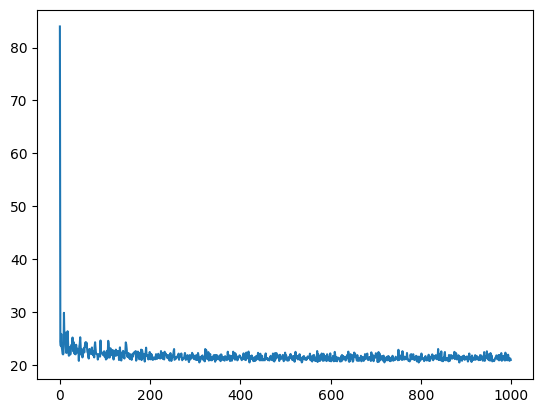

In [22]:
plt.plot(all_cost)

In [23]:
y_pred = []
y_true = []
net.train = False
for inp, label in test_loder:
    y_pred.append(net(inp).detach().numpy())
    y_true.append(label.numpy())

In [24]:
for i in range(len(y_pred)):
    for j in range(len(y_pred[0])):
        try:
            print(y_pred[i][j], y_true[i][j])
        except:
            pass

[22.40258] 14.1
[22.932566] 34.9
[22.58785] 22.8
[22.384977] 14.4
[22.526701] 18.4
[22.578611] 24.5
[22.534758] 18.9
[22.944275] 32.2
[22.522013] 16.1
[22.919214] 41.3
[22.53749] 14.2
[22.336153] 13.8
[22.497946] 13.5
[22.534023] 20.4
[22.627829] 23.2
[22.62427] 22.2
[22.752977] 26.4
[22.498938] 13.0
[22.778605] 24.1
[22.797823] 25.1
[22.540575] 17.5
[22.80836] 27.9
[22.545128] 16.7
[22.389833] 15.0
[22.75958] 27.1
[22.854092] 35.2
[21.99191] 7.0
[22.57251] 24.3
[22.590994] 20.6
[22.483168] 14.0
[22.5481] 19.7
[23.338625] 48.8
[22.534616] 18.4
[23.325497] 50.0
[22.588718] 26.4
[22.569769] 23.9
[22.569801] 21.4
[22.266287] 8.3
[22.616968] 20.7
[22.55135] 13.8
[22.577417] 26.5
[22.513102] 19.6
[22.617119] 26.6
[22.845533] 29.0
[22.518202] 12.7
[22.563814] 17.4
[23.07486] 43.8
[22.470842] 27.5
[22.693253] 22.6
[22.99677] 31.0
[22.373995] 13.1
[22.570734] 23.2
[22.687943] 30.1
[22.501713] 12.1
[22.4635] 15.4
[22.549131] 16.6
[22.431871] 11.7
[22.339659] 12.7
[22.438694] 15.6
[22.541452] 18

In [25]:
y_true

[array([14.1, 34.9, 22.8, 14.4, 18.4, 24.5, 18.9, 32.2, 16.1, 41.3, 14.2,
        13.8, 13.5, 20.4, 23.2, 22.2, 26.4, 13. , 24.1, 25.1, 17.5, 27.9,
        16.7, 15. , 27.1, 35.2,  7. , 24.3, 20.6, 14. , 19.7, 48.8, 18.4,
        50. , 26.4, 23.9, 21.4,  8.3, 20.7, 13.8], dtype=float32),
 array([26.5, 19.6, 26.6, 29. , 12.7, 17.4, 43.8, 27.5, 22.6, 31. , 13.1,
        23.2, 30.1, 12.1, 15.4, 16.6, 11.7, 12.7, 15.6, 18.7, 50. ,  8.8,
        13.8, 23. , 19.6, 20.5, 33.4, 28.6, 50. , 21.4, 25. , 19.4, 19.6,
        22.7, 13.1, 24.7, 30.1,  9.7, 16.8,  7. ], dtype=float32),
 array([27.9, 17.2, 17.3, 15.2, 19.6, 24.4, 21.5, 33.2, 44.8, 36.1, 24.8,
        23.1, 10.4, 22.2, 22.4, 22.6, 21.4, 17.8, 17.1, 19.4, 50. , 30.3,
        19. ,  8.3, 19.4, 17.9, 20.6, 20.3, 24.1, 24.7, 10.8, 13.1, 16.2,
        23.1, 19.7, 20.3,  8.1, 21.7, 17.6, 21.2], dtype=float32),
 array([22.1, 21.7, 23.9, 37.6, 23.4, 23. , 18.6], dtype=float32)]